In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## 1. Data

In [28]:
def read_raw_arrays(f):
    with open(f) as linetxt:
        return np.array([
            np.array(li.split(','), dtype=np.float) 
            # Each line is a character
            for li in linetxt.readlines()
        ])
           
# emotion of a female characters
data_female_emotion = read_raw_arrays('data/metadata/female_emotion.txt')
# cumulative emotion of a female characters
data_female_cum     = read_raw_arrays('data/metadata/female_cum.txt')
# emotion of a male characters
data_male_emotion   = read_raw_arrays('data/metadata/male_emotion.txt')
# cumulative emotion of a male characters
data_male_cum       = read_raw_arrays('data/metadata/male_cum.txt')

print(
    len(data_female_emotion),
    len(data_female_cum    ),
    len(data_male_emotion  ),
    len(data_male_cum      ),
)


7226 7226 7226 7226


In [29]:
series_len = pd.Series([len(li) for li in data_female_emotion])
series_len.describe()

count      7226.000000
mean       1997.224190
std        4460.418388
min          59.000000
25%        1131.000000
50%        1735.000000
75%        2431.000000
max      357764.000000
dtype: float64

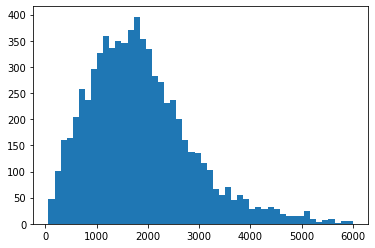

In [30]:
%matplotlib inline

# Long tailed. 75% is 2431, I take 6000
plt.hist(series_len[ series_len < 6000 ], bins=50)
# plt.xscale('log')
plt.show()

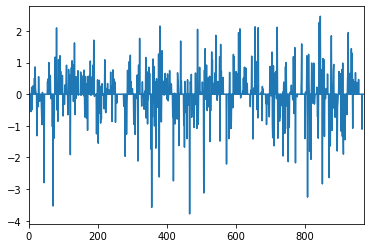

In [31]:
%matplotlib inline
pd.Series(data_female_emotion[0]).plot()

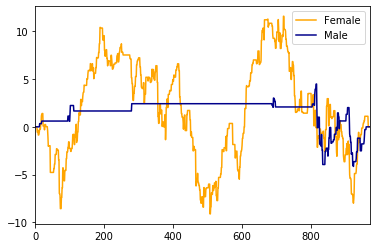

In [32]:
plt.figure()
pd.Series(data_female_cum[0]).plot(c='orange')
pd.Series(data_male_cum[0]).plot(c='darkblue')
plt.legend(['Female', 'Male'])
plt.show()

## 2. Viz of Stream Plots

### 2.1 Stream plots

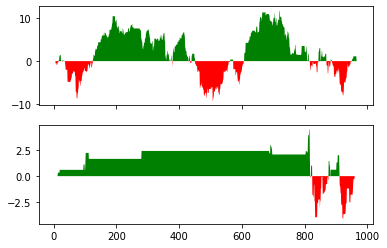

In [33]:
story_idx = 0

x = pd.Series(data_female_cum[story_idx]).index
y_female_acc = data_female_cum[story_idx]
y_male_acc = data_male_cum[story_idx]

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.fill_between(x, 0, y_female_acc, 
                 where=(y_female_acc >= 0), facecolor='green', interpolate=True)
ax1.fill_between(x, 0, y_female_acc, 
                 where=(y_female_acc < 0), facecolor='red', interpolate=True)

ax2.fill_between(x, 0, y_male_acc, 
                 where=(y_male_acc >= 0), facecolor='green', interpolate=True)
ax2.fill_between(x, 0, y_male_acc, 
                 where=(y_male_acc < 0), facecolor='red', interpolate=True)

plt.show()

### 2.2 Data smoothing

In [34]:
# Smooth data version
story_idx = 0

smooth_frac = 10
x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
y_female_acc = data_female_cum[story_idx][::smooth_frac]
y_male_acc = data_male_cum[story_idx][::smooth_frac]

x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
f1 = interp1d(x, y_female_acc, kind='quadratic')
f2 = interp1d(x, y_male_acc, kind='quadratic')
y1 = f1(x_smooth)
y2 = f2(x_smooth)

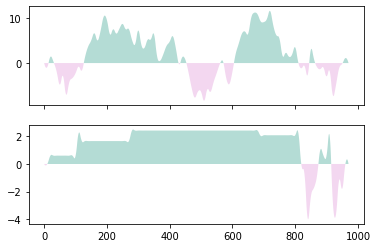

In [35]:
color_up = '#b4dcd5'
color_down = '#f3d7f0'

_, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.fill_between(x_smooth,  0, y1, 
                 where=(y1 >= 0), facecolor=color_up, interpolate=True)
ax1.fill_between(x_smooth,  0, y1, 
                 where=(y1 < 0), facecolor=color_down, interpolate=True)

ax2.fill_between(x_smooth,  0, y2, 
                 where=(y2 >= 0), facecolor=color_up, interpolate=True)
ax2.fill_between(x_smooth,  0, y2, 
                 where=(y2 < 0), facecolor=color_down, interpolate=True)

plt.show()

In [36]:
def show_acc_stream_plot(story_idx, smooth_frac=10):
    color_up = '#b4dcd5'
    color_down = '#f3d7f0'
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)
    
    # Matplotlib
    _, [ax0, ax1, ax2] = plt.subplots(3, 1, sharex=True)
    
    ax0.plot(x, y_female_acc, c='pink')
    ax0.plot(x, y_male_acc)
    ax0.legend(['Female', 'Male'])
    
    ax1.fill_between(x_smooth,  0, y1, 
                     where=(y1 >= 0), facecolor=color_up, interpolate=True)
    ax1.fill_between(x_smooth,  0, y1, 
                     where=(y1 < 0), facecolor=color_down, interpolate=True)
    
    ax2.fill_between(x_smooth,  0, y2, 
                     where=(y2 >= 0), facecolor=color_up, interpolate=True)
    ax2.fill_between(x_smooth,  0, y2, 
                     where=(y2 < 0), facecolor=color_down, interpolate=True)
    
    ax0.title.set_text(f'story #{story_idx}')
    plt.show()

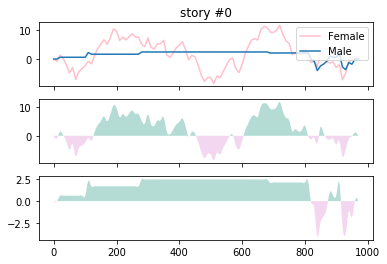

In [37]:
show_acc_stream_plot(story_idx=0)

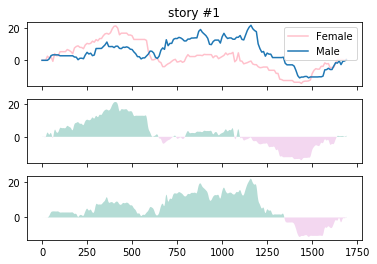

In [38]:
show_acc_stream_plot(story_idx=1)

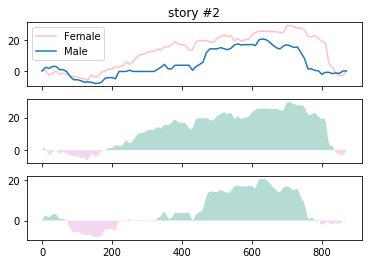

In [39]:
show_acc_stream_plot(story_idx=2)

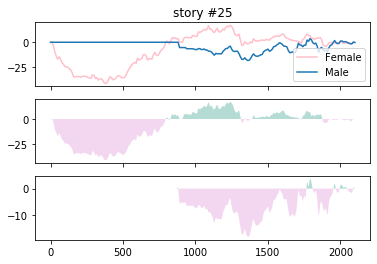

In [40]:
show_acc_stream_plot(story_idx=25)

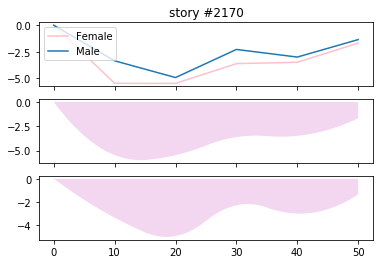

In [41]:
# The text that has roughly 50 lines 
show_acc_stream_plot(story_idx=2170)

### 2.3 Filled-between versions

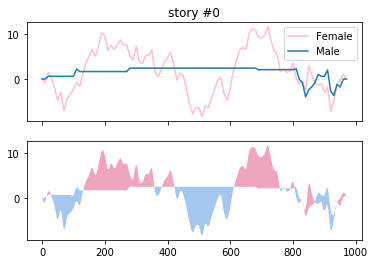

In [42]:

def show_acc_stream_plot__fill_between(
        story_idx, 
        smooth_frac=10):
    
    color_up = '#efa5bd'
    color_down = '#A5C6EF'
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)
    
    # Matplotlib
    fig, [ax0, ax1] = plt.subplots(2, 1, sharex=True)
    
    ax0.plot(x, y_female_acc, c='pink')
    ax0.plot(x, y_male_acc)
    ax0.legend(['Female', 'Male'])
    
    ax1.fill_between(x_smooth, y2, y1, 
                     where=(y1 >= y2), facecolor=color_up, interpolate=True)
    ax1.fill_between(x_smooth, y2, y1, 
                     where=(y1 < y2), facecolor=color_down, interpolate=True)
    
    ax0.title.set_text(f'story #{story_idx}')
    plt.show()

# test example
show_acc_stream_plot__fill_between(0)

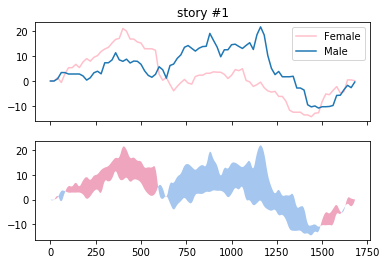

In [43]:
show_acc_stream_plot__fill_between(story_idx=1, smooth_frac=20)

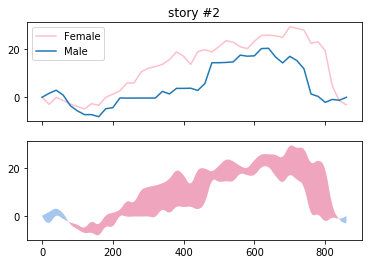

In [44]:
show_acc_stream_plot__fill_between(story_idx=2, smooth_frac=20)

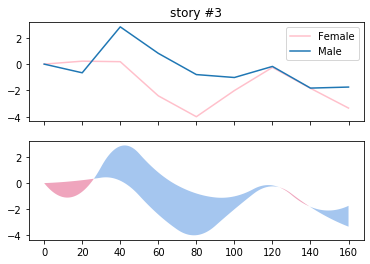

In [45]:
show_acc_stream_plot__fill_between(story_idx=3, smooth_frac=20)

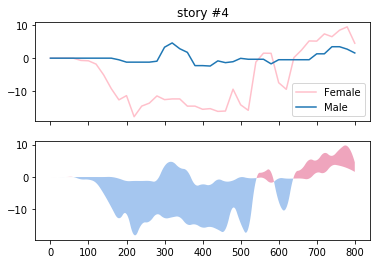

In [46]:
show_acc_stream_plot__fill_between(story_idx=4, smooth_frac=20)


In [47]:
# Story index that's around 2000 sentances-long
idx_est2000 = series_len[ (2000<series_len) & (series_len<2100) ].index
print('Num of stories around 2000 sentances:', len(idx_est2000))

Num of stories around 2000 sentances: 256


In [48]:
smooth_frac = 20
stories_idx = idx_est2000[:48]

# Matplotlib
fig, arr_ax = plt.subplots(16, 3, 
                           sharex=False, 
                           figsize=(18, 44), 
                           dpi=300)

for ax, story_idx in zip(arr_ax.flatten(), stories_idx):
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)

    ax.fill_between(x_smooth, y2, y1, 
                     where=(y1 >= y2), facecolor=color_up, interpolate=True)
    ax.fill_between(x_smooth, y2, y1, 
                     where=(y1 < y2), facecolor=color_down, interpolate=True)

    ax.title.set_text(f'story #{story_idx}')

plt.tight_layout()
plt.show()

### Experiment with overlay

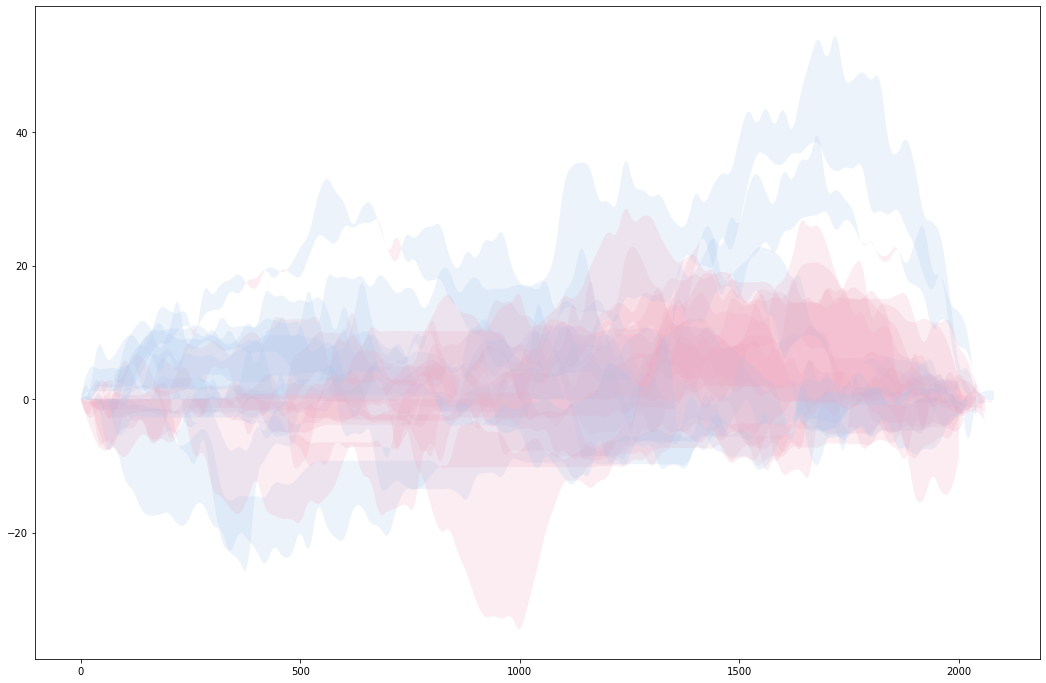

In [72]:
plt.figure(figsize=(18, 12), facecolor='w')

color_up = '#efa5bd'
color_down = '#A5C6EF'

for story_idx in idx_est2000[:16]:
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)

    plt.fill_between(x_smooth, y2, y1, 
                     where=(y1 >= y2), 
                     facecolor=color_up, alpha=0.2, interpolate=True)
    plt.fill_between(x_smooth, y2, y1, 
                     where=(y1 < y2), 
                     facecolor=color_down, alpha=0.2, interpolate=True)

    # ax.title.set_text(f'story #{story_idx}')

plt.show()

we are using stories: [5669,3977,1420,2491,5172,5143,3419,1135,5648,1128,5976,4856,5859,3163,6571,173]


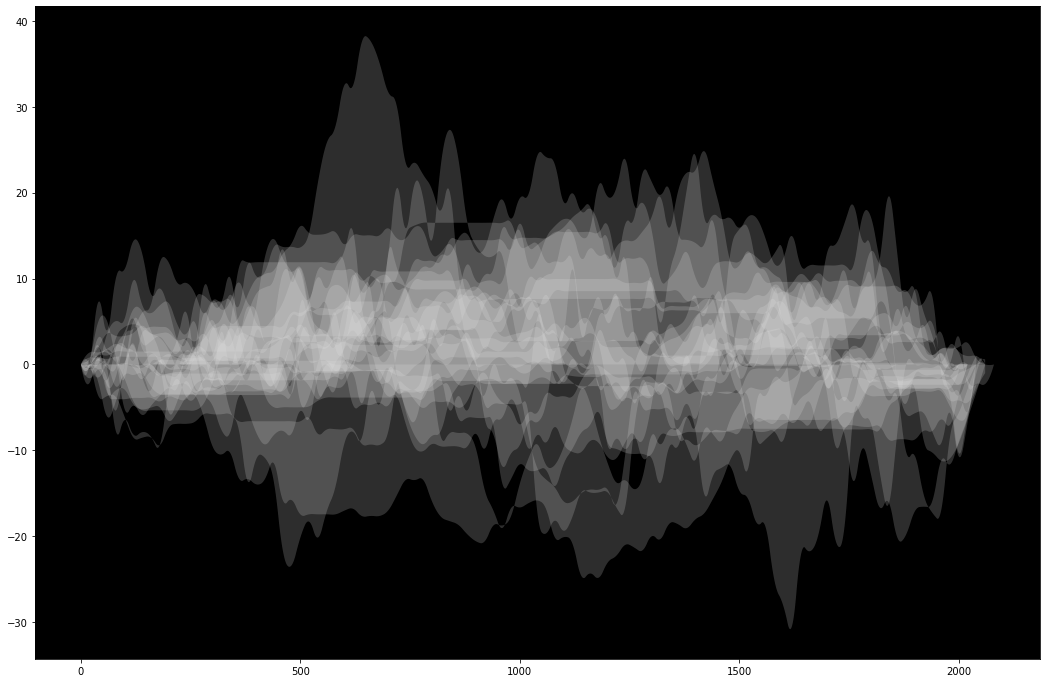

In [101]:
fig = plt.figure(figsize=(18, 12), facecolor='w')
ax = fig.add_subplot(1,1,1)

color_up = color_down = '#e4e4e4'

# Random choose some stories for plotting
idx_list = idx_est2000.values.copy()
np.random.shuffle(idx_list)
idx_list = idx_list[:16]
print(f'we are using stories: {str(idx_list.tolist()).replace(" ", "")}')

for story_idx in idx_list:
    
    x = pd.Series(data_female_cum[story_idx]).index[::smooth_frac]
    y_female_acc = data_female_cum[story_idx][::smooth_frac]
    y_male_acc = data_male_cum[story_idx][::smooth_frac]
    
    x_smooth = np.linspace(x.min(), x.max(), smooth_frac*len(x))
    f1 = interp1d(x, y_female_acc, kind='quadratic')
    f2 = interp1d(x, y_male_acc, kind='quadratic')
    y1 = f1(x_smooth)
    y2 = f2(x_smooth)

    ax.fill_between(x_smooth, y2, y1, 
                     where=(y1 >= y2), 
                     facecolor=color_up, alpha=0.2, interpolate=True)
    ax.fill_between(x_smooth, y2, y1, 
                     where=(y1 < y2), 
                     facecolor=color_down, alpha=0.2, interpolate=True)

    # ax.title.set_text(f'story #{story_idx}')

ax.set_facecolor('black')
plt.show()

[2555,5254,6908,271,588,3977,658,5753,1612,1561,1263,2552,4631,4231,3186,3181]

![](out/2555,5254,6908,271,588,3977,658,5753,1612,1561,1263,2552,4631,4231,3186,3181.png)

[5961,5012,1112,4729,4230,4385,5807,2490,1561,4740,2079,551,7002,4797,1507,4376]
![](out/5961,5012,1112,4729,4230,4385,5807,2490,1561,4740,2079,551,7002,4797,1507,4376.png)

[2490,5325,538,2610,6187,3637,6360,5326,5391,6638,1135,2020,5776,3580,5807,6256]
![](out/2490,5325,538,2610,6187,3637,6360,5326,5391,6638,1135,2020,5776,3580,5807,6256.png)

## 3. Take co-occurrence into account


In [23]:
def get_cooc_indices(story_idx):
    """
    Return male and female character co-oc indices list
    :param story_idx: 
    :return: 
    """
    index_nz_female = np.flatnonzero(data_female_emotion[story_idx])
    index_nz_male = np.flatnonzero(data_male_emotion[story_idx])
    
    return np.intersect1d(index_nz_female, index_nz_male)

In [24]:
get_cooc_indices(0)

array([ 13,  19,  95,  99, 687, 690, 695, 697, 811, 812, 818, 828, 875,
       877, 883, 902, 906, 911, 912, 913, 917, 923, 924, 931, 932, 935,
       947, 954, 956])